In [1]:
# --*-- encoding: utf-8 --*--
import pandas as pd
data_train_online = pd.read_csv(r'ccf_online_stage1_train.csv')
# print (data_train_online.head())
print (data_train_online.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
User_id          1048575 non-null int64
Merchant_id      1048575 non-null int64
Action           1048575 non-null int64
Coupon_id        1048575 non-null object
Discount_rate    1048575 non-null object
Date_received    1048575 non-null object
Date             1048575 non-null object
dtypes: int64(3), object(4)
memory usage: 56.0+ MB
None


In [ ]:
# 第一步：先读取该表格的相关信息

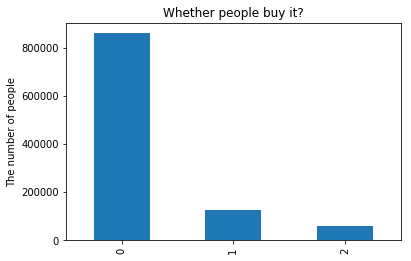

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
data_train_online.Action.value_counts().plot(kind='bar')
plt.title(u"Whether people buy it?") # puts a title on our graph
plt.ylabel(u"The number of people")
plt.show()

In [ ]:
# 第二步：可视化，发现里面的零值很多，是我们可以排除掉的冗余数据

In [3]:
# --*-- encoding: utf-8 --*--
import pandas as pd
data_train_online = pd.read_csv(r'ccf_online_stage1_train.csv')
# print (data_train_online.head())
data_index = data_train_online[(data_train_online['Action'].isin([0]))]
data_train_online = data_train_online.drop(data_index.index)
data_train_online

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513,null
1,13740231,34805,1,null,null,null,20160321
19,10539231,12008,1,null,null,null,20160618
21,10539231,12008,1,null,null,null,20160618
73,15137031,25104,2,100120354,150:50,20160613,null
74,15137031,44706,2,100071973,50:5,20160317,null
75,15137031,18206,1,null,null,null,20160514
76,15137031,18206,1,null,null,null,20160514
77,15137031,18206,1,null,null,null,20160514
78,15137031,18206,1,null,null,null,20160514


In [ ]:
# 第三步：将Action中的零值的行去掉，发现行数仍然很多，考虑进一步清洗

In [4]:
user_action = data_train_online.groupby('User_id')
table_user_action = user_action['Action'].sum().reset_index()
table_user_action = table_user_action[table_user_action.Action >= 10]
table_user_action

,User_id,Action
0,387,17
15,6104,21
26,8390,20
34,12716,12
49,17474,25
62,22434,32
67,24274,12
81,27750,12
83,28843,12
88,30846,11


In [ ]:
# 第四步：找出活跃用户的id（这里认为Action>=10的是活跃用户）

In [5]:
data_train_online = data_train_online[data_train_online.User_id.isin(table_user_action.User_id)]
data_train_online

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
73,15137031,25104,2,100120354,150:50,20160613,null
74,15137031,44706,2,100071973,50:5,20160317,null
75,15137031,18206,1,null,null,null,20160514
76,15137031,18206,1,null,null,null,20160514
77,15137031,18206,1,null,null,null,20160514
78,15137031,18206,1,null,null,null,20160514
79,15137031,18206,1,null,null,null,20160514
80,15137031,18206,1,null,null,null,20160514
81,15137031,18206,1,null,null,null,20160514
82,15137031,18206,1,null,null,null,20160514


In [ ]:
# 第五步：再一次清洗表格，只保留活跃用户的信息

In [6]:
who_getcoupon = data_train_online[(data_train_online['Action'].isin([2]))]
who_getcoupon

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
73,15137031,25104,2,100120354,150:50,20160613,null
74,15137031,44706,2,100071973,50:5,20160317,null
114,15137031,29007,2,100028000,30:1,20160405,null
115,15137031,18907,2,100086665,300:50,20160406,null
116,15137031,18907,2,100160219,300:30,20160317,null
132,12634431,18907,2,100060941,800:50,20160614,null
133,12634431,18907,2,100060941,800:50,20160614,null
134,12634431,18907,2,100231315,500:50,20160614,null
135,12634431,18907,2,100231315,500:50,20160614,null
136,12634431,18907,2,100025195,1000:100,20160614,null


In [ ]:
# 第六步：领取过优惠券的人，发现大部分领取的人并不会使用。排除这个特征

In [7]:
who_buy = data_train_online[(data_train_online['Action'].isin([1]))]
who_buy

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
75,15137031,18206,1,null,null,null,20160514
76,15137031,18206,1,null,null,null,20160514
77,15137031,18206,1,null,null,null,20160514
78,15137031,18206,1,null,null,null,20160514
79,15137031,18206,1,null,null,null,20160514
80,15137031,18206,1,null,null,null,20160514
81,15137031,18206,1,null,null,null,20160514
82,15137031,18206,1,null,null,null,20160514
83,15137031,18206,1,null,null,null,20160514
84,15137031,18206,1,null,null,null,20160514


In [ ]:
# 第七步：注意到很多人爱同时购买一样商品很多件，并且容易成为回头客

In [8]:
who_buysum = who_buy['Action'].groupby([who_buy['User_id'], who_buy['Merchant_id']]).sum().reset_index()
who_buysum

,User_id,Merchant_id,Action
0,387,14305,3
1,387,49205,2
2,6104,13615,15
3,8390,25912,3
4,8390,34406,1
5,12716,17615,9
6,12716,26406,1
7,17474,26602,5
8,17474,30707,1
9,17474,32313,1


In [ ]:
# 第八步：谁买了什么，买了几次

In [9]:
who_buyactive = who_buysum[who_buysum.Action>=5]
who_buyactive = who_buy[who_buy.User_id.isin(who_buyactive.User_id)&who_buy.Merchant_id.isin(who_buyactive.Merchant_id)]
who_buyactive

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
75,15137031,18206,1,null,null,null,20160514
76,15137031,18206,1,null,null,null,20160514
77,15137031,18206,1,null,null,null,20160514
78,15137031,18206,1,null,null,null,20160514
79,15137031,18206,1,null,null,null,20160514
80,15137031,18206,1,null,null,null,20160514
81,15137031,18206,1,null,null,null,20160514
82,15137031,18206,1,null,null,null,20160514
83,15137031,18206,1,null,null,null,20160514
84,15137031,18206,1,null,null,null,20160514


In [ ]:
# 第九步：这里认为一个用户重复购买五次以上相同商品，则未来再次在网上购买该商品的可能性更大

In [ ]:
who_buyactive['Coupon_id'] = who_buyactive['Coupon_id'].apply(lambda x: 1 if pd.isnull(x) else 0)
who_buyactive['Discount_rate'] = who_buyactive['Discount_rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
who_buyactive['Date_received'] = who_buyactive['Date_received'].apply(lambda x: 1 if pd.isnull(x) else 0)
who_buyactive

In [ ]:
# 第十步：这里可以把表中的null替换为0其他的为1（没在这里执行）